In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import os
import pandas as pd
from pathlib import Path
# from pyts.image import GramianAngularField # not currently working in env 
import seaborn as sns
from sklearn.preprocessing import minmax_scale
import torch
from tqdm.notebook import tqdm
from fastai.vision import *

# # load any resources fr4om this library 
# from src import data

In [59]:
days = list(range(290, 305))
days

[290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304]

In [60]:
year = 2012
location = "hawaii"

In [61]:
dataframes = list()
for d in days: 
    
    print("\n--- " + str(d) + "---")
    
    # read in the data 
    df = data.read_day(
        location=location,
        year=year,
        day_of_year=d
    )
    dataframes.append(df)


  0%|          | 8/1656 [00:00<00:22, 74.84it/s]


--- 290---
Reading dataframes...


100%|██████████| 1656/1656 [00:23<00:00, 71.66it/s]


Concatenating dataframes...


  1%|          | 9/1654 [00:00<00:19, 85.30it/s]


--- 291---
Reading dataframes...


100%|██████████| 1654/1654 [00:22<00:00, 73.95it/s]


Concatenating dataframes...


  0%|          | 8/1646 [00:00<00:22, 73.64it/s]


--- 292---
Reading dataframes...


100%|██████████| 1646/1646 [00:21<00:00, 75.50it/s]


Concatenating dataframes...


  0%|          | 8/1649 [00:00<00:22, 71.56it/s]


--- 293---
Reading dataframes...


100%|██████████| 1649/1649 [00:21<00:00, 75.59it/s]


Concatenating dataframes...


  0%|          | 6/1655 [00:00<00:27, 58.96it/s]


--- 294---
Reading dataframes...


100%|██████████| 1655/1655 [00:21<00:00, 75.67it/s]


Concatenating dataframes...


  0%|          | 6/1648 [00:00<00:28, 57.36it/s]


--- 295---
Reading dataframes...


100%|██████████| 1648/1648 [00:22<00:00, 73.74it/s]


Concatenating dataframes...


  0%|          | 8/1655 [00:00<00:21, 75.80it/s]


--- 296---
Reading dataframes...


100%|██████████| 1655/1655 [00:22<00:00, 74.05it/s]


Concatenating dataframes...


  0%|          | 8/1647 [00:00<00:21, 74.90it/s]


--- 297---
Reading dataframes...


100%|██████████| 1647/1647 [00:21<00:00, 76.01it/s]


Concatenating dataframes...


  0%|          | 7/1657 [00:00<00:24, 68.67it/s]


--- 298---
Reading dataframes...


100%|██████████| 1657/1657 [00:22<00:00, 74.72it/s]


Concatenating dataframes...


  0%|          | 7/1656 [00:00<00:24, 68.62it/s]


--- 299---
Reading dataframes...


100%|██████████| 1656/1656 [00:22<00:00, 75.17it/s]


Concatenating dataframes...


  0%|          | 4/1595 [00:00<00:48, 32.96it/s]


--- 300---
Reading dataframes...


100%|██████████| 1595/1595 [00:22<00:00, 71.42it/s]


Concatenating dataframes...


  1%|          | 8/1596 [00:00<00:20, 78.50it/s]


--- 301---
Reading dataframes...


100%|██████████| 1596/1596 [00:22<00:00, 71.72it/s]


Concatenating dataframes...


  1%|          | 9/1597 [00:00<00:17, 88.89it/s]


--- 302---
Reading dataframes...


100%|██████████| 1597/1597 [00:22<00:00, 70.82it/s]


Concatenating dataframes...


  0%|          | 7/1597 [00:00<00:24, 65.07it/s]


--- 303---
Reading dataframes...


100%|██████████| 1597/1597 [00:22<00:00, 71.25it/s]


Concatenating dataframes...


  1%|          | 8/1596 [00:00<00:21, 72.41it/s]


--- 304---
Reading dataframes...


100%|██████████| 1596/1596 [00:22<00:00, 70.02it/s]


Concatenating dataframes...


In [62]:
# concatenate the dataframes loaded previously into one large dataframe 
df_all = pd.concat(dataframes) 

In [63]:
# let's filter this down to just one satellite for now 
df_model = df_all.filter(regex='ahup__G07', axis=1).resample("1min").mean()

In [64]:
df_model.shape

(21600, 6)

In [65]:
df_model.head()

,ahup__G07,ahup__G07_lat,ahup__G07_lon,ahup__G07_h_ipp,ahup__G07_ele,ahup__G07_azi
timestamp,,,,,,
2012-10-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-16 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-16 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-16 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-16 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN


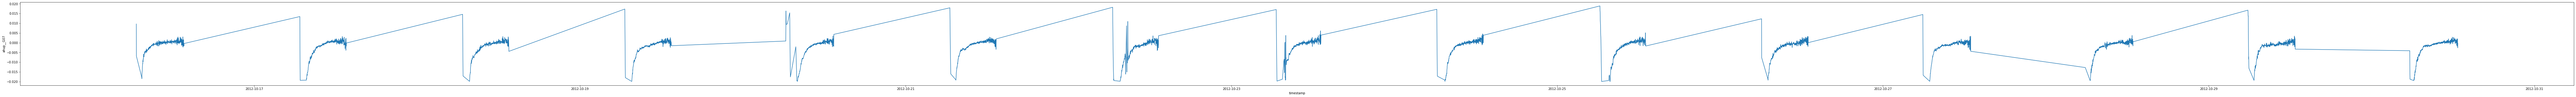

In [66]:
plt.figure(figsize=(150, 5))
ax = sns.lineplot(
    data=df_model, x=df_model.index, y="ahup__G07"
)
plt.show()

In [67]:
events = np.split(df_model, np.where(np.isnan(df_model))[0])

In [68]:
len(events)

97111

In [69]:
events = [ev[~np.isnan(ev)] for ev in events if not isinstance(ev, np.ndarray)]

In [70]:
len(events)

97111

In [71]:
events = [ev.dropna() for ev in events if not ev.empty and ev.shape[0] > 100]

In [72]:
len(events)

15

In [73]:
normalized_events = list()
for ev in events: 

    # for each column in the data, rescale -1 to 1 
    col_data = list()
    for col in ev.columns.values:

        normalized_data = minmax_scale(
                    ev[col].dropna(), 
                    feature_range=(-1, 1)
                )
        col_data.append(normalized_data)

    df_period = pd.DataFrame(np.array(col_data).T, columns=list(ev.columns.values) )
    df_period["timestamp"] = ev[col].index
    df_period.index = df_period["timestamp"]
    df_period = df_period.drop(columns=["timestamp"])

    # convert to seconds of the day for later annotation 
    df_period["sod"] = (df_period.index.hour*60+df_period.index.minute)*60 + df_period.index.second

    normalized_events.append(df_period)

In [74]:
len(normalized_events)

15

In [75]:
# we want to "window" across the remaining data and generate square images 
WINDOW_SIZE = 60

In [76]:
# for each period (event)
# for each observation 
# get the data + window if defined 
# generate the normal plot 
# generate the GADF 
# plot them side by side 
# save the image to disk then download locally and go through and label them 

In [90]:
for period, doy in tqdm(zip(events, days), total=len(events)): 
    
    # create a directory for this new data 
#     if not os.path.exists("../data/image_based/hawaii/ahup__G07/" + str(doy)):
    Path("../data/image_based/hawaii/ahup__G07/" + str(doy) + "/GAF").mkdir(parents=True, exist_ok=True)
    Path("../data/image_based/hawaii/ahup__G07/" + str(doy) + "/lineplot").mkdir(parents=True, exist_ok=True)
    
    for idx in list(range(period.shape[0])):
        
        # get subsetted window 
        subset = period.iloc[idx:idx+WINDOW_SIZE, :]
        if subset.shape[0] < WINDOW_SIZE:
            pass
        
        else:
            
            # generate the base image 
            figure = plt.figure(figsize=(5,5), frameon=False)
            
            ax = plt.Axes(figure, [0., 0., 1., 1.])
            ax.set_axis_off()
            figure.add_axes(ax)
            
            figure = plt.plot(list(range(idx, idx+WINDOW_SIZE)), subset["ahup__G07"])[0]
            
            x_axis = figure.axes.get_xaxis()
            x_axis.set_visible(False)

            y_axis = figure.axes.get_yaxis()
            y_axis.set_visible(False)
#             plt.show() 
            
            plt.savefig("../data/image_based/hawaii/ahup__G07/" + str(doy) + "/lineplot/" + str(doy) + "_" + str(idx) + "_" + str(idx + WINDOW_SIZE) + ".jpg")
            
            plt.close()
            
            # now generate the field 
            transformer = GramianAngularField()
            X_new = transformer.fit_transform(np.array([subset["ahup__G07"]]))
            
            figure = plt.figure(figsize=(5,5), frameon=False)
        
            ax = plt.Axes(figure, [0., 0., 1., 1.])
            ax.set_axis_off()
            figure.add_axes(ax)
            
            figure = plt.imshow(X_new[0], cmap='viridis', origin='lower')
            
            x_axis = figure.axes.get_xaxis()
            x_axis.set_visible(False)

            y_axis = figure.axes.get_yaxis()
            y_axis.set_visible(False)
            
#             plt.show()
            
            plt.savefig("../data/image_based/hawaii/ahup__G07/" + str(doy) + "/GAF/" + str(doy) + "_" + str(idx) + "_" + str(idx + WINDOW_SIZE) + "_GAF.jpg")

            
            plt.close()

            
                

## Modeling

In [18]:
from fastai.vision import *

In [19]:
fastai.vision

<module 'fastai.vision' from '/home/vconstan/.conda/envs/tsunami-new/lib/python3.6/site-packages/fastai/vision/__init__.py'>

In [33]:
data = get_image_files("/home/vconstan/projects/sTEC-d-dt-Anomaly-Detection/data/image_based/hawaii/ahup__G07/labeled")

In [34]:
data

(#4343) [Path('/home/vconstan/projects/sTEC-d-dt-Anomaly-Detection/data/image_based/hawaii/ahup__G07/labeled/anomalous/302_135_195_GAF.jpg'),Path('/home/vconstan/projects/sTEC-d-dt-Anomaly-Detection/data/image_based/hawaii/ahup__G07/labeled/anomalous/302_126_186_GAF.jpg'),Path('/home/vconstan/projects/sTEC-d-dt-Anomaly-Detection/data/image_based/hawaii/ahup__G07/labeled/anomalous/302_142_202_GAF.jpg'),Path('/home/vconstan/projects/sTEC-d-dt-Anomaly-Detection/data/image_based/hawaii/ahup__G07/labeled/anomalous/302_151_211_GAF.jpg'),Path('/home/vconstan/projects/sTEC-d-dt-Anomaly-Detection/data/image_based/hawaii/ahup__G07/labeled/anomalous/302_78_138_GAF.jpg'),Path('/home/vconstan/projects/sTEC-d-dt-Anomaly-Detection/data/image_based/hawaii/ahup__G07/labeled/anomalous/302_105_165_GAF.jpg'),Path('/home/vconstan/projects/sTEC-d-dt-Anomaly-Detection/data/image_based/hawaii/ahup__G07/labeled/anomalous/302_116_176_GAF.jpg'),Path('/home/vconstan/projects/sTEC-d-dt-Anomaly-Detection/data/image

In [91]:
dls = ImageDataLoaders.from_folder(
    "/home/vconstan/projects/sTEC-d-dt-Anomaly-Detection/data/image_based/hawaii/ahup__G07/labeled", 
    item_tfms=Resize(224),
    valid_pct=0.2,
    bs=32,
    ds_tfms=aug_transforms(do_flip=True, flip_vert=True)
)

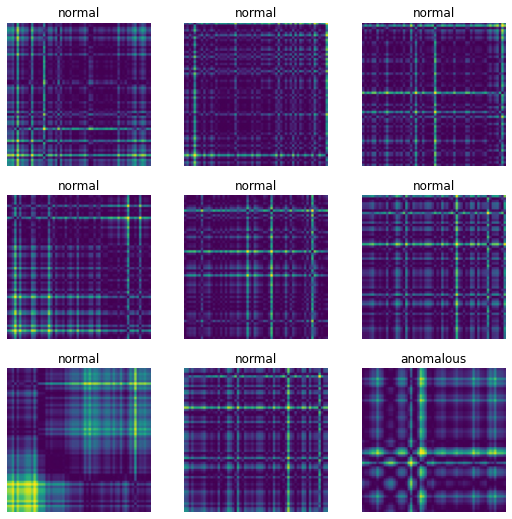

In [108]:
dls.show_batch()

SuggestedLRs(lr_min=0.05248074531555176, lr_steep=2.7542285919189453)

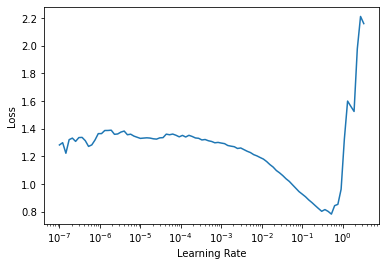

In [130]:
learn = cnn_learner(dls, squeezenet1_1, metrics=error_rate)
# learn = create_cnn(dls, resnet34, metrics=error_rate, callback_fns=ShowGraph)

learn.lr_find()
# learn.recorder.plot()

In [131]:
learn.fit_one_cycle(25) # TODO: add callbacks such as showgraph and early stopping

epoch,train_loss,valid_loss,error_rate,time
0,1.117805,0.704727,0.312212,00:04
1,0.839174,0.459147,0.145161,00:04
2,0.547354,0.262056,0.051843,00:04
3,0.256581,0.229616,0.033410,00:04
4,0.109828,0.111316,0.021889,00:04
5,0.049317,0.166064,0.010369,00:04
6,0.026895,0.022503,0.008065,00:04
7,0.012857,0.010991,0.006912,00:04
8,0.012895,0.005383,0.002304,00:04
9,0.013260,0.002223,0.001152,00:04


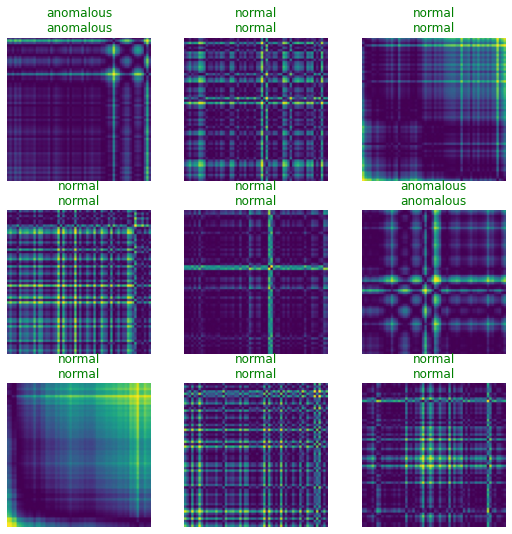

In [132]:
learn.show_results()

In [133]:
interp = ClassificationInterpretation.from_learner(learn)

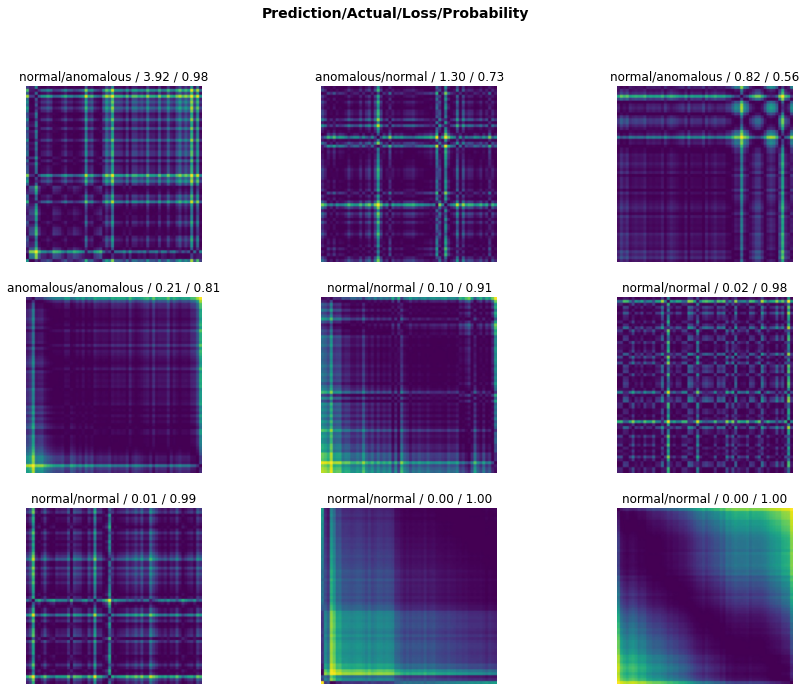

In [134]:
interp.plot_top_losses(9, figsize=(15,11))

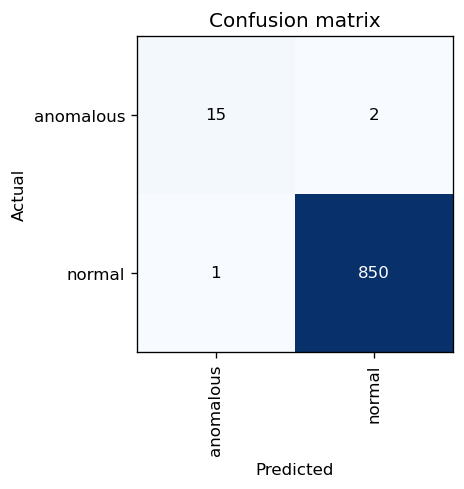

In [135]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)